In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
import scipy.stats as stats
# this library is used to plot QQ plots

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn .compose import ColumnTransformer

In [3]:
 df = pd.read_csv('/kaggle/input/test-file/tested.csv', usecols =['Age', 'Fare', 'Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [5]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [13]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Fare'].fillna(df['Fare'].mean(), inplace = True)

In [14]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [16]:
# x aur y extract kr lenge
X = df.iloc[:, 1:3]  # age and fare
y = df.iloc[:,0]     # survived would be o/p col

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

/tmp/ipykernel_32/306696777.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


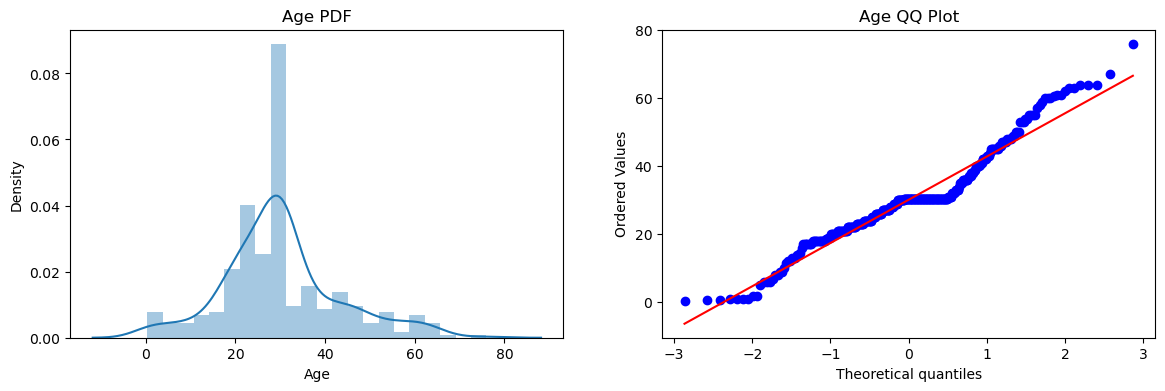

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'] , dist="norm", plot = plt)
plt.title('Age QQ Plot')

plt.show()

/tmp/ipykernel_32/880450992.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


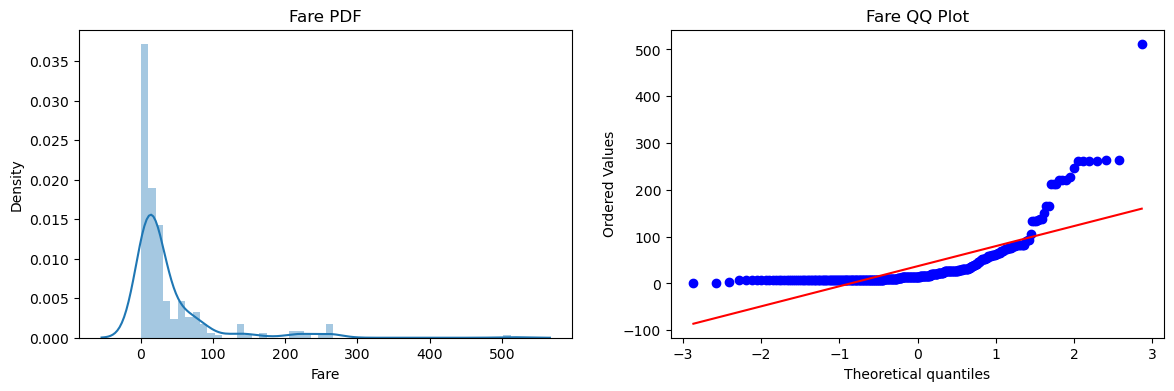

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'] , dist="norm", plot = plt)
plt.title('Fare QQ Plot')

plt.show()

the data is right-skewed

In [22]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [26]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred2))



Accuracy LR 0.6071428571428571
Accuracy DT 0.5357142857142857


In [27]:
# now we will apply transformation function
trf = FunctionTransformer(func = np.log1p)

In [28]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [29]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed , y_train)
clf2.fit(X_train_transformed , y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))


Accuracy LR 0.6190476190476191
Accuracy DT 0.5595238095238095


In [30]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, y, scoring = 'accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring = 'accuracy', cv=10)))

LR 0.6556329849012775
DT 0.5932636469221835


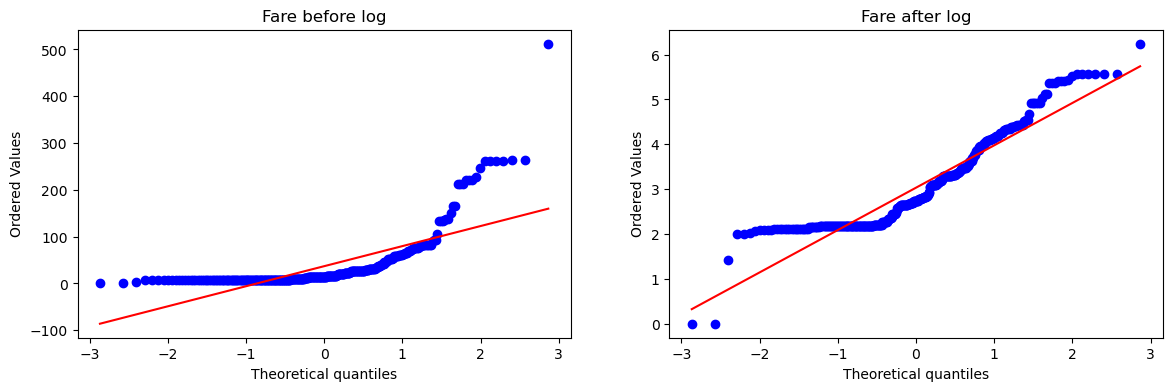

In [32]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'] , dist="norm", plot = plt)
plt.title('Fare before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'] , dist="norm", plot = plt)
plt.title('Fare after log')

plt.show()

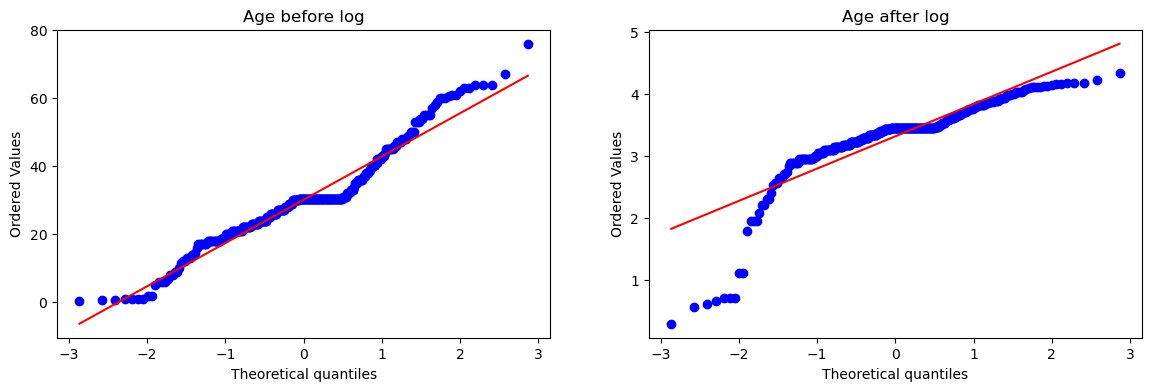

In [33]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'] , dist="norm", plot = plt)
plt.title('Age before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'] , dist="norm", plot = plt)
plt.title('Age after log')

plt.show()

In [35]:
# rather than both the columns, we will try to apply log transformation only on the fare column.

trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p),['Fare'])], remainder = 'passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [36]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2 , y_train)
clf2.fit(X_train_transformed2 , y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred2))


Accuracy LR 0.6190476190476191
Accuracy DT 0.5476190476190477


In [39]:
def apply_transform(transform):
    X = df.iloc[: , 1:3]
    y = df.iloc[: , 0]
    
    trf = ColumnTransformer([('log', FunctionTransformer(np.log1p),['Fare'])], remainder = 'passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy", np.mean(cross_val_score(clf, X_trans, y, scoring = 'accuracy', cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'] , dist="norm", plot = plt)
    plt.title('Fare before transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0] , dist="norm", plot = plt)
    plt.title('Fare after Transform')

    plt.show()
    

Accuracy 0.6507549361207897


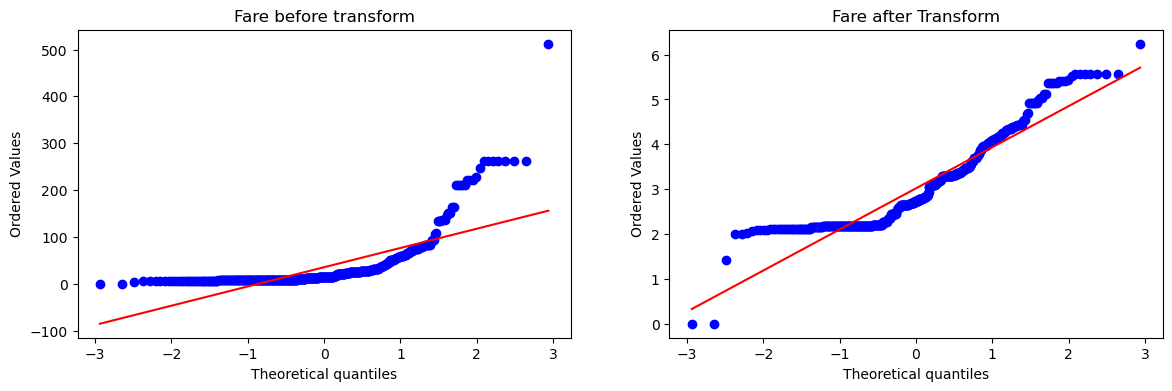

In [40]:
apply_transform(lambda x:x)

Accuracy 0.6507549361207897


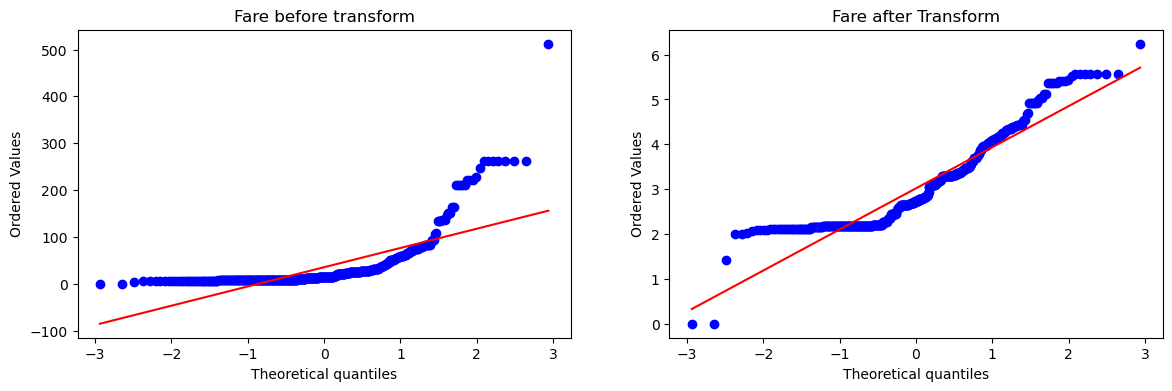

In [41]:
# sq
apply_transform(lambda x:x**2)

Accuracy 0.6507549361207897


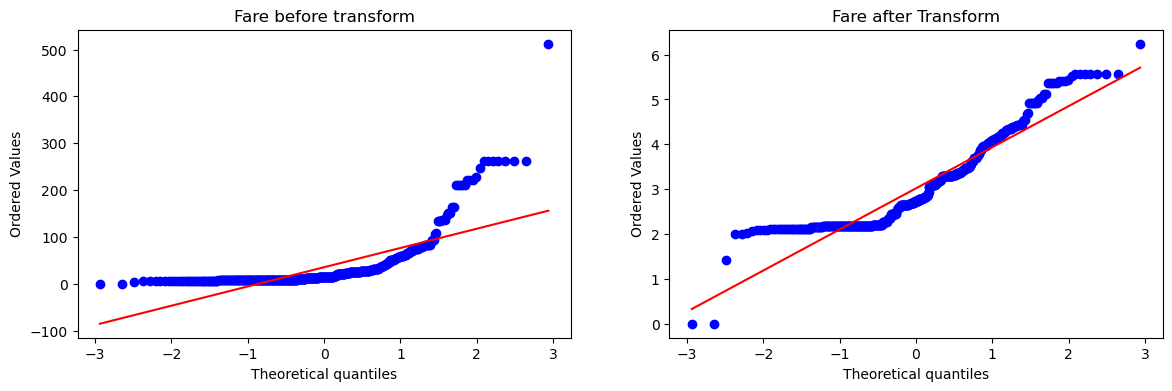

In [42]:
# sqrt
apply_transform(lambda x:x**1/2)

Accuracy 0.6507549361207897


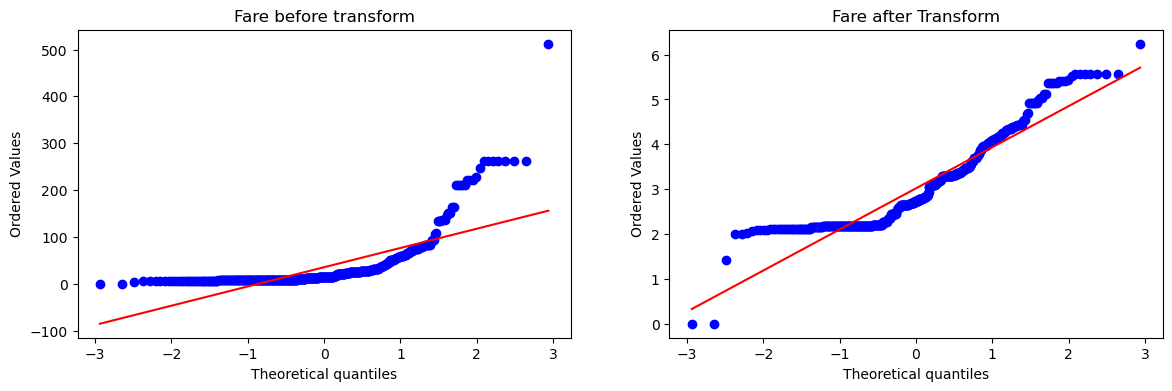

In [43]:
# reciprocal
apply_transform(lambda x:x**1/2)